# Estadística con Python

### GitHub repository: https://github.com/jorgemauricio/python_statistics

### Instructor: Jorge Mauricio

## EDA

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

In [9]:
#librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# leer archivo csv "store_info.csv"
df = pd.read_csv("data/store_info.csv")

In [16]:
# visualizar la estructura del archivo
df.head()

,BranchName,Week,DayWeek,Day,Month,Hour,Transaction_Type,Units,Amount
0,Tiendita,1,3,2,1,9,Card,3,$54.00
1,Tiendita,1,3,2,1,10,Cash,7,-$17.80
2,Tiendita,1,3,2,1,10,Card,7,$41.99
3,Tiendita,1,3,2,1,11,Card,20,$412.50
4,Tiendita,1,3,2,1,12,Cash,1,-$18.00


In [13]:
# visualizar el tipo de dato de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 9 columns):
BranchName          4100 non-null object
Week                4100 non-null int64
DayWeek             4100 non-null int64
Day                 4100 non-null int64
Month               4100 non-null int64
Hour                4100 non-null int64
Transaction_Type    4100 non-null object
Units               4100 non-null int64
Amount              4100 non-null object
dtypes: int64(6), object(3)
memory usage: 288.4+ KB


In [17]:
# eliminar el signo de $ de los datos
df['Amount'] = df['Amount'].str.replace('$','').str.replace(',','')

In [18]:
# verificar la estructura
df.head()

,BranchName,Week,DayWeek,Day,Month,Hour,Transaction_Type,Units,Amount
0,Tiendita,1,3,2,1,9,Card,3,54.00
1,Tiendita,1,3,2,1,10,Cash,7,-17.80
2,Tiendita,1,3,2,1,10,Card,7,41.99
3,Tiendita,1,3,2,1,11,Card,20,412.50
4,Tiendita,1,3,2,1,12,Cash,1,-18.00


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 9 columns):
BranchName          4100 non-null object
Week                4100 non-null int64
DayWeek             4100 non-null int64
Day                 4100 non-null int64
Month               4100 non-null int64
Hour                4100 non-null int64
Transaction_Type    4100 non-null object
Units               4100 non-null int64
Amount              4100 non-null object
dtypes: int64(6), object(3)
memory usage: 288.4+ KB


In [21]:
# convertir columna 'Amount' a dato númerico
df['Amount'] = pd.to_numeric(df['Amount'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 9 columns):
BranchName          4100 non-null object
Week                4100 non-null int64
DayWeek             4100 non-null int64
Day                 4100 non-null int64
Month               4100 non-null int64
Hour                4100 non-null int64
Transaction_Type    4100 non-null object
Units               4100 non-null int64
Amount              4100 non-null float64
dtypes: float64(1), int64(6), object(2)
memory usage: 288.4+ KB


In [22]:
# filas y columnas
df.shape

(4100, 9)

In [23]:
df.describe()

,Week,DayWeek,Day,Month,Hour,Units,Amount
count,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000
mean,34.017805,4.183902,15.812195,8.231463,12.949024,12.779512,35.237046
std,14.714289,1.967864,8.810817,3.396586,2.631853,17.854968,183.538724
min,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,-1041.800000
25%,29.000000,3.000000,8.000000,7.000000,11.000000,3.000000,-47.000000
50%,37.000000,4.000000,16.000000,9.000000,13.000000,8.000000,-2.385000
75%,45.000000,6.000000,23.000000,11.000000,15.000000,16.000000,99.512500
max,53.000000,7.000000,31.000000,12.000000,19.000000,274.000000,1487.000000


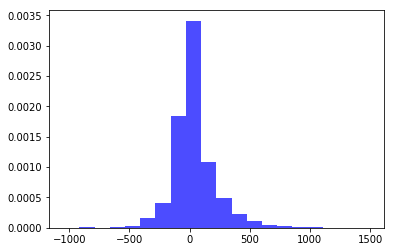

In [27]:
# distribución de las ventas
plt.hist(df["Amount"],bins=20,density=1,facecolor='blue',alpha=0.7)
plt.show()

Se puede determinar que las ventas varian de -1000 a 1000

## Ventas por mes, día y hora

In [29]:
# Mensuales
sales_by_month = df.groupby('Month').size()
print(sales_by_month)

Month
1     604
7     606
8     572
9     580
10    581
11    587
12    570
dtype: int64


Text(0, 0.5, 'Venta Total')

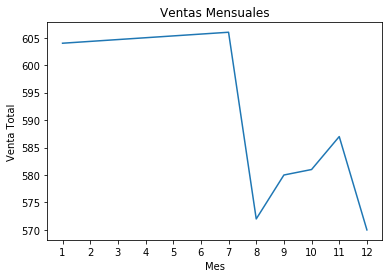

In [31]:
#Plotting the Graph
plot_by_month = sales_by_month.plot(title='Ventas Mensuales',xticks=(1,2,3,4,5,6,7,8,9,10,11,12))
plot_by_month.set_xlabel('Mes')
plot_by_month.set_ylabel('Venta Total')

Text(0, 0.5, 'Venta Total')

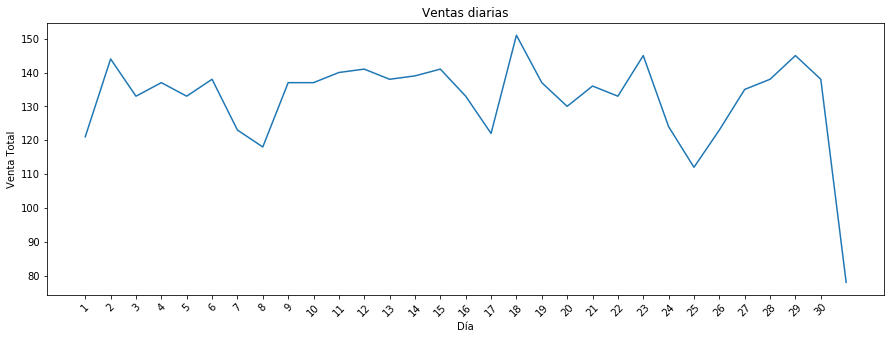

In [35]:
# Por día
fig = plt.figure(figsize=(15,5))
sales_by_day = df.groupby('Day').size()
plot_by_day = sales_by_day.plot(title='Ventas diarias',xticks=(range(1,31)),rot=45)
plot_by_day.set_xlabel('Día')
plot_by_day.set_ylabel('Venta Total')

El día con mayor ventas fue el día 18

Text(0, 0.5, 'Venta Total')

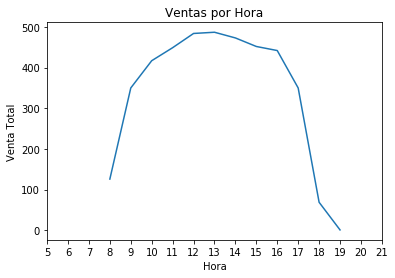

In [36]:
sales_by_hour = df.groupby('Hour').size()
plot_by_hour = sales_by_hour.plot(title='Ventas por Hora',xticks=(range(5,22)))
plot_by_hour.set_xlabel('Hora')
plot_by_hour.set_ylabel('Venta Total')

In [38]:
sales_by_day.idxmax()

18

Text(19, 151, 'Mejor Venta')

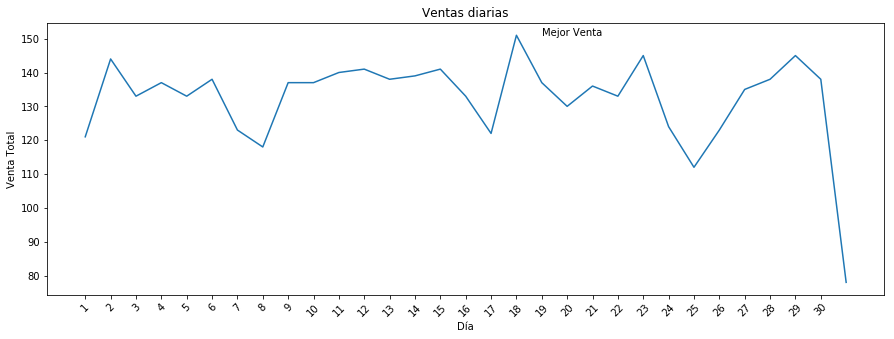

In [42]:
# Por día
fig = plt.figure(figsize=(15,5))
sales_by_day = df.groupby('Day').size()
plot_by_day = sales_by_day.plot(title='Ventas diarias',xticks=(range(1,31)),rot=45)
plot_by_day.set_xlabel('Día')
plot_by_day.set_ylabel('Venta Total')
plot_by_day.text(sales_by_day.idxmax() + 1,sales_by_day.max(),"Mejor Venta")

In [40]:
sales_by_day.max()

151